<a href="https://colab.research.google.com/github/01Sagar10/Project/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart disease detection
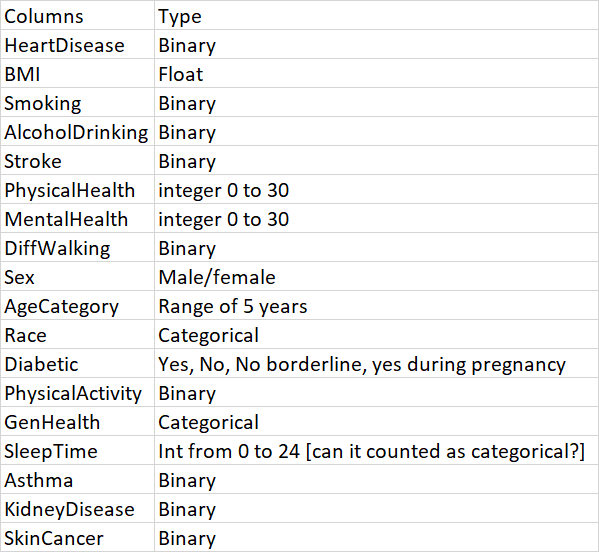

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn  import tree
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [116]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /Capstone Heart disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df = df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })

df['Diabetic'] = df['Diabetic'].astype(int)

<ipython-input-5-518c9044cf7f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [122]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.135590,0.775362,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.342353,0.417344,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000


In [6]:
df['Diabetic'].unique()

array([1, 0])

# Exploratory Data Analysis

In [13]:
df[df['HeartDisease'] == 1]['Sex'].value_counts()

,count
Sex,
1,16139
0,11234


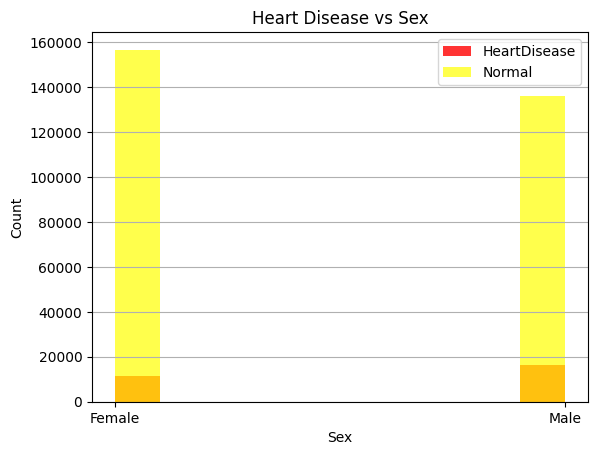

In [7]:
plt.hist(df[df['HeartDisease']== 1]['Sex'], bins = 10, color='red', label = 'HeartDisease', alpha = 0.8)
plt.hist(df[df['HeartDisease']== 0]['Sex'], bins = 10, color = 'yellow', label = 'Normal', alpha = 0.7)
plt.xticks([0,1],['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease vs Sex')
plt.legend()
plt.grid(True, axis = 'y')
plt.show()

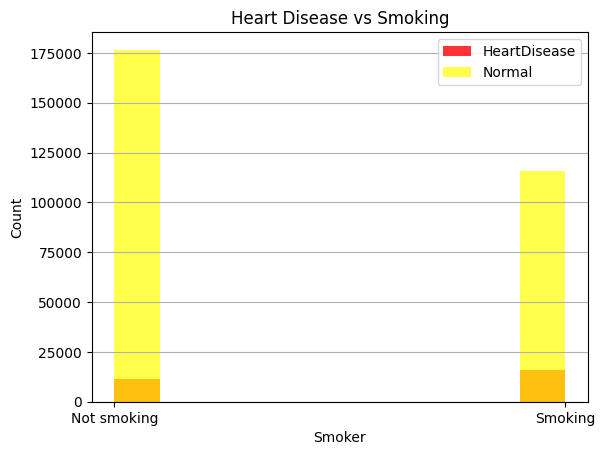

In [8]:
plt.hist(df[df['HeartDisease']== 1]['Smoking'], bins = 10, color='red', label = 'HeartDisease', alpha = 0.8)
plt.hist(df[df['HeartDisease']== 0]['Smoking'], bins = 10, color = 'yellow', label = 'Normal', alpha = 0.7)
plt.xticks([0,1],['Not smoking', 'Smoking'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Heart Disease vs Smoking')
plt.legend()
plt.grid(True, axis = 'y')
plt.show()

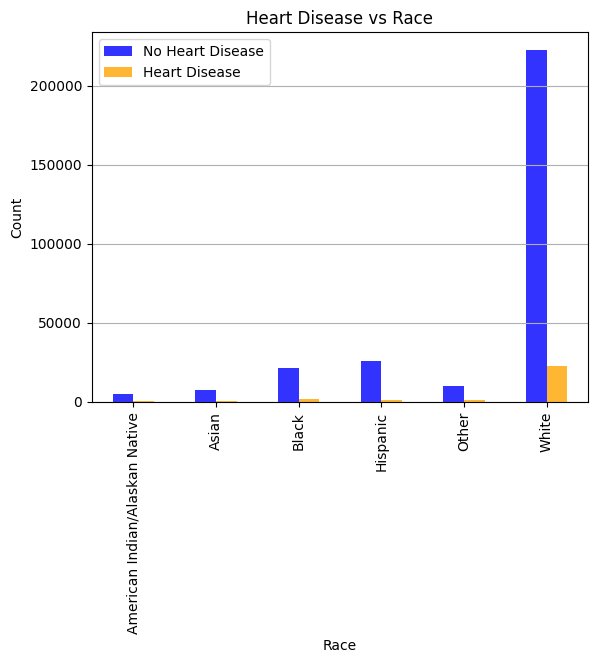

In [14]:
heart_disease_counts = df.groupby(['Race', 'HeartDisease'])['HeartDisease'].count().unstack()

heart_disease_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Heart Disease vs Race')
plt.grid(True, axis = 'y')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

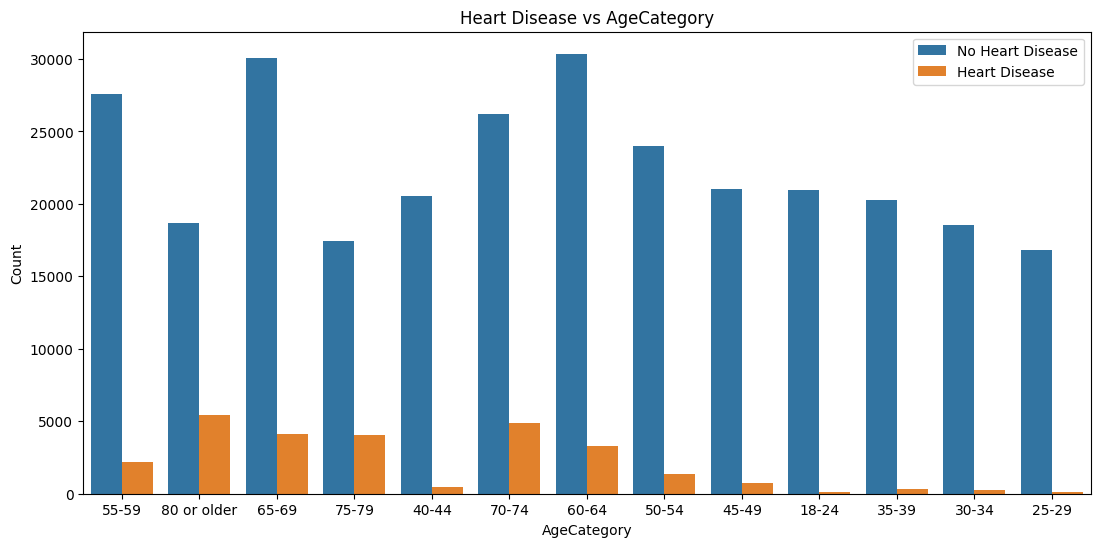

In [15]:
plt.figure(figsize = (13,6))
sns.countplot(x= df['AgeCategory'], hue = 'HeartDisease',data = df)
#sns.histplot(x= df[df['HeartDisease']== 0]['Race'], data=df, bins = 10, color = 'yellow', label = 'Normal', alpha = 0.7)
plt.xlabel('AgeCategory')
plt.ylabel('Count')
plt.title('Heart Disease vs AgeCategory')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

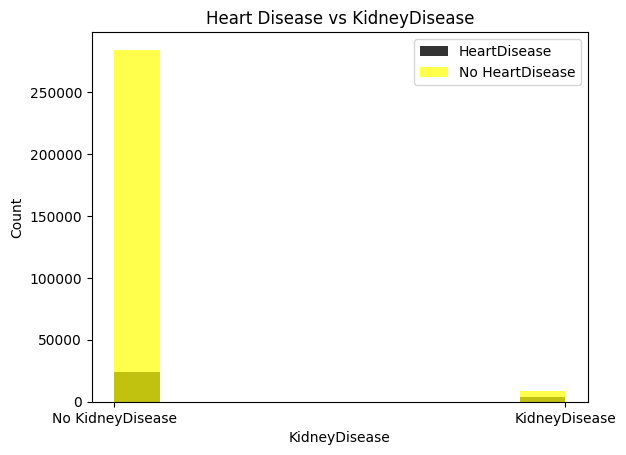

In [16]:
plt.hist(x= df[df['HeartDisease']== 1]['KidneyDisease'], bins = 10, color='black', label = 'HeartDisease', alpha = 0.8)
plt.hist(x= df[df['HeartDisease']== 0]['KidneyDisease'], bins = 10, color = 'yellow', label = 'No HeartDisease', alpha = 0.7)
plt.xticks([0,1], ['No KidneyDisease', 'KidneyDisease'])
plt.xlabel('KidneyDisease')
plt.ylabel('Count')
plt.title('Heart Disease vs KidneyDisease')
plt.legend()
plt.show()

In [18]:
No_kidney_heart = len(df[(df['KidneyDisease'] == 0) & (df['HeartDisease'] == 1)])
print(f'No kidney disease and heart disease {No_kidney_heart} out of {len(df[df["KidneyDisease"] == 0])}')

Nokidney_heart_percent = (No_kidney_heart / len(df[df['KidneyDisease'] == 0])) *100
print(f'Percentage {round(Nokidney_heart_percent, 2)} %')


kidney_heart = len(df[(df['KidneyDisease'] == 1) & (df['HeartDisease'] == 1)])
print(f'Kidney disease and heart disease {kidney_heart} out of {len(df[df["KidneyDisease"] == 1])}')

kidney_heart_percent = (kidney_heart / len(df[df['KidneyDisease'] == 1])) *100
print(f'Percentage {round(kidney_heart_percent,2)} %')

No kidney disease and heart disease 23918 out of 308016
Percentage 7.77 %
Kidney disease and heart disease 3455 out of 11779
Percentage 29.33 %


#model Training

In [19]:
df1 = df.copy()
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,White,0,1,Very good,8,0,0,0


In [20]:
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}
df1['Age'] = df1['AgeCategory'].map(age_mapping)

In [21]:
num = df1[["HeartDisease",'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',

       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime',

       'Asthma', 'KidneyDisease', 'SkinCancer', 'Age']]

In [22]:
from dataclasses import replace
stdscaler = StandardScaler()

df1['BMI'] = stdscaler.fit_transform(df1[['BMI']])
df1['GenHealth'] = df1['GenHealth'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4})
df1['Race'] = df1['Race'].replace({'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Hispanic': 4, 'Other': 5})
df1.drop('AgeCategory', axis=1, inplace=True)

<ipython-input-22-e31296b5b914>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['GenHealth'] = df1['GenHealth'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4})
<ipython-input-22-e31296b5b914>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Race'] = df1['Race'].replace({'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Hispanic': 4, 'Other': 5})


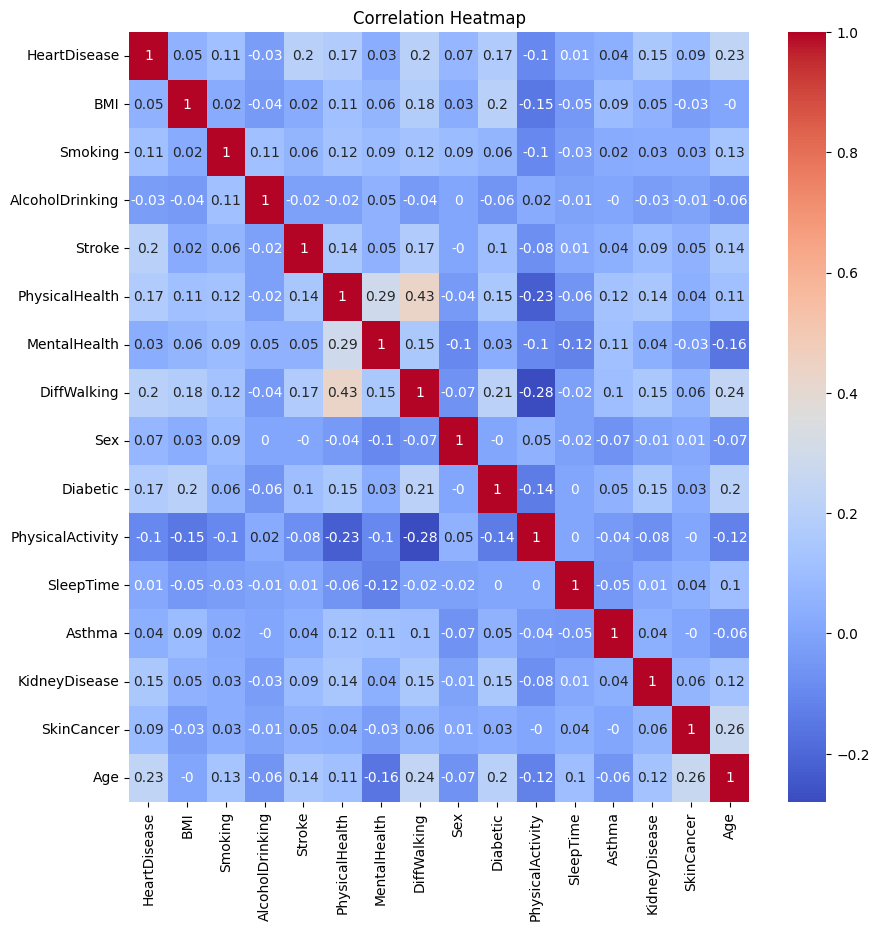

In [23]:
correlation = num.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

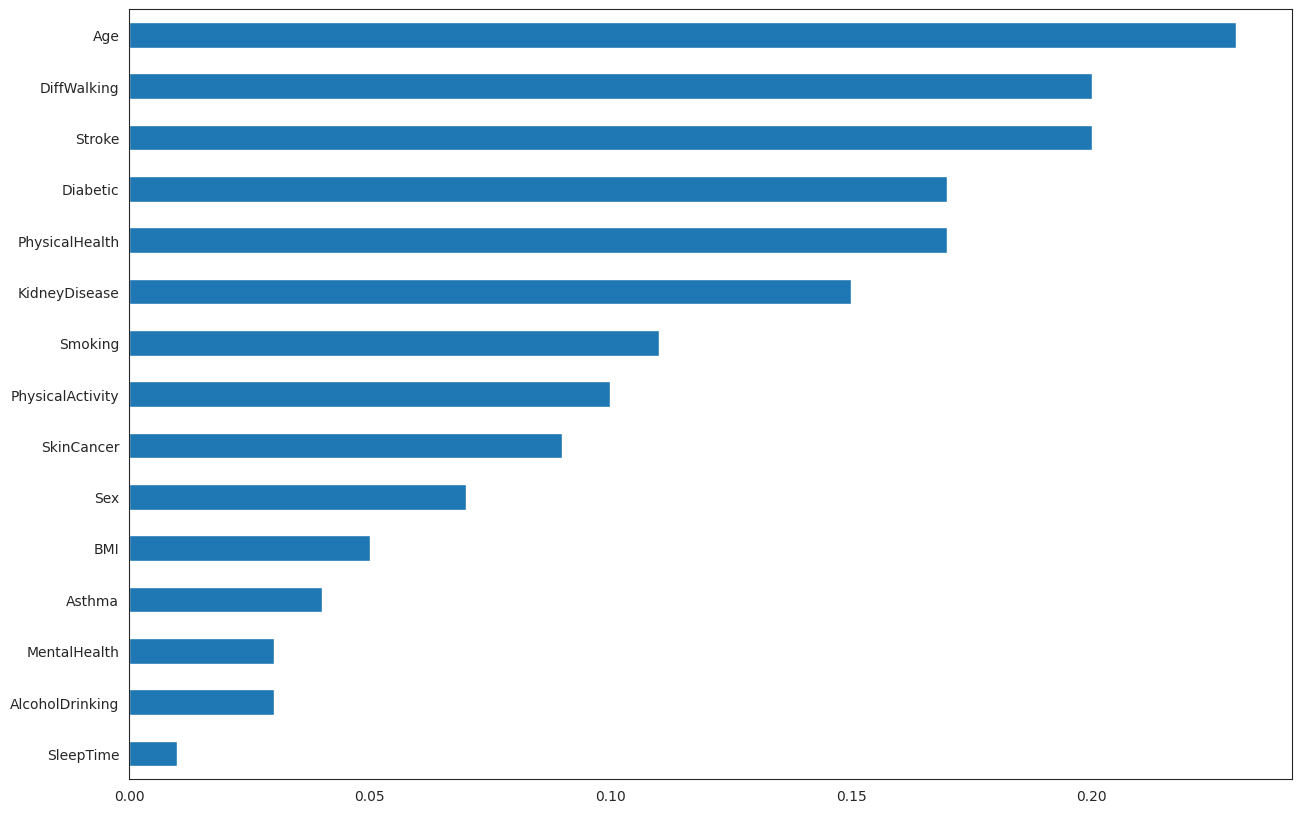

In [24]:
sns.set_style('white')
plt.figure(figsize=(15,10))
abs(correlation['HeartDisease']).sort_values()[:-1].plot(kind='barh')
plt.show()

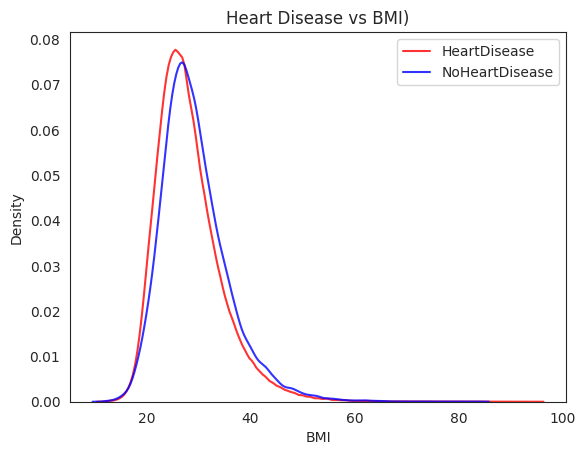

In [25]:
sns.kdeplot(x = df[df['HeartDisease']== 0]['BMI'],  color='red', label = 'HeartDisease', alpha = 0.8 )
sns.kdeplot(x = df[df['HeartDisease']== 1]['BMI'], color='blue', label = 'NoHeartDisease', alpha = 0.8 )
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Heart Disease vs BMI)')
plt.legend()
plt.show()
#

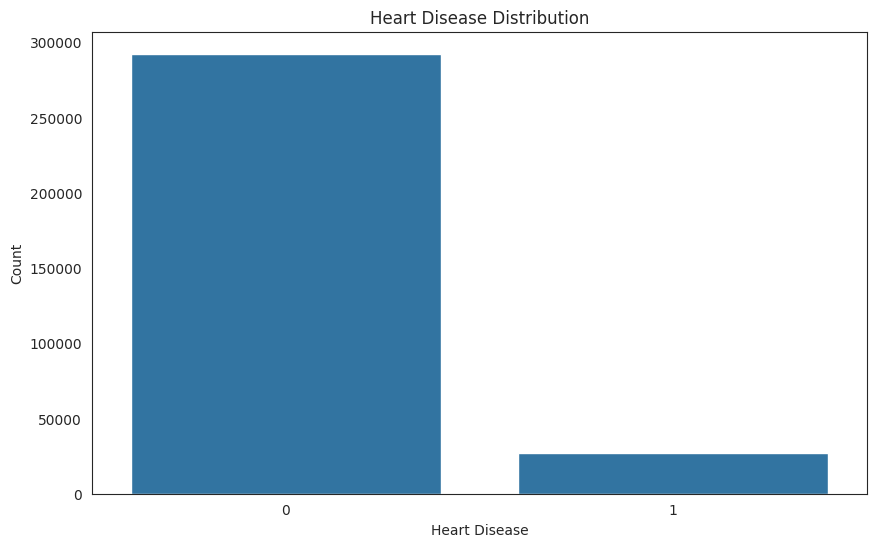

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HeartDisease', data=df1)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

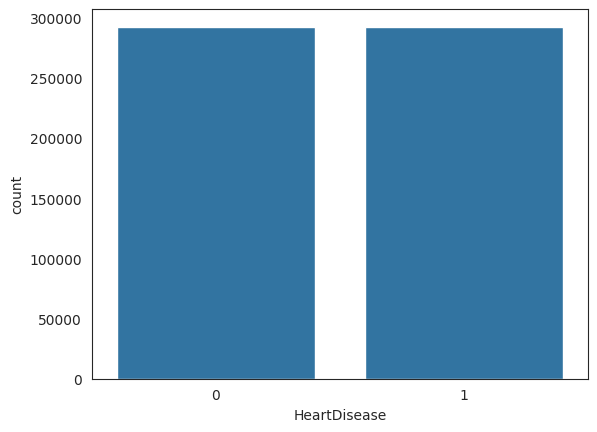

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(df1.drop('HeartDisease', axis=1), df1['HeartDisease'])
sns.countplot(x=y_resampled)
plt.show()

In [67]:
len(df1)

319795

In [75]:
len(X_resampled)

584844

In [77]:
y_resampled.value_counts()

,count
HeartDisease,
0,292422
1,292422


In [37]:
len(df1[df1['HeartDisease']==1])

27373

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
len(y_test)

116969

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87     58485
           1       0.85      0.89      0.87     58484

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969

[[49410  9075]
 [ 6342 52142]]


In [42]:
rf_predict_prob = model.predict_proba(X_test)[:, 1]
print(rf_predict_prob)

[0.89 0.64 0.03 ... 0.04 0.33 0.  ]


In [44]:
print(len(rf_predict_prob))

116969


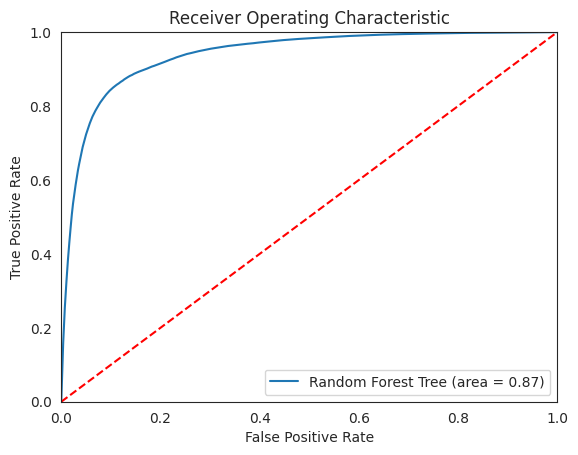

In [141]:
from sklearn import metrics
# Compute the ROC AUC score
decision_roc_auc = metrics.roc_auc_score(y_test, y_pred)

# Compute the ROC curve data points
rffpr, rftpr, rfthresholds = metrics.roc_curve(y_test,rf_predict_prob)

#It’s a calculation of true positive rate (TPR) and the false positive rate (FPR) for the positive class as the decision threshold is varied

# Plot the ROC curve
plt.plot(rffpr, rftpr, label='Random Forest Tree (area = %0.2f)' % decision_roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
# Set the limits, labels, title, and legend

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [142]:
optimal_idx = (rftpr - rffpr).argmax()
optimal_threshold = rfthresholds[optimal_idx]
optimal_threshold

0.6111666666666669

###To get better Recall for class1-(has heart disease), lowered the threshold

In [41]:
y_pred_new = (rf_predict_prob >= 0.4).astype(int)
print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     58485
           1       0.82      0.92      0.86     58484

    accuracy                           0.86    116969
   macro avg       0.86      0.86      0.86    116969
weighted avg       0.86      0.86      0.86    116969

[[46360 12125]
 [ 4724 53760]]


#Interpretation

1. Class-Level Performance

**Class 0 (No Heart Disease):**

Precision (0.91): Out of all instances predicted as "No Heart Disease," 91% were correctly identified. This means there’s a relatively low false positive rate for this class.

Recall (0.79): Out of all actual "No Heart Disease" cases, 79% were correctly identified, indicating some false negatives.

F1-Score (0.85): This score balances precision and recall, with an 85% effective classification for this class.

**Class 1 (Heart Disease):**

Precision (0.82): Out of all instances predicted as "Heart Disease," 82% were correct. There are some false positives for this class.

Recall (0.92): Out of all true "Heart Disease" cases, 92% were correctly detected, reflecting strong recall for this class.

F1-Score (0.86): The balance of precision and recall is high here, indicating that the model performs slightly better for detecting "Heart Disease" than "No Heart Disease."

2. Overall Accuracy (0.86)
The model correctly classified 86% of all instances, which is a solid performance for a health-based prediction model. This metric considers both classes but can be misleading if classes are imbalanced (which is not the case here due to SMOTE).

3. Macro and Weighted Averages

**Macro Avg (0.86 for precision and recall):** The macro average calculates the average performance per class without accounting for class balance. With both classes having almost equal precision and recall, it shows balanced performance across classes.

**Weighted Avg (0.86 for precision and recall):** The weighted average takes into account the number of instances per class. It’s identical to the macro average in this case because both classes have equal instances after SMOTE resampling.



**Summary Interpretation**


Model has a high precision (0.91) for identifying "No Heart Disease" but a slightly lower recall (0.79), meaning it misses some "No Heart Disease" cases.

 For "Heart Disease," the model has slightly lower precision (0.82) but a high recall (0.92), so it captures most heart disease cases correctly.

##Given the health context, the model’s high recall for detecting "Heart Disease" (Class 1) is critical,

as it minimizes the risk of missing actual cases of heart disease. The slight compromise in precision (meaning a few false positives) may be acceptable in a screening scenario, where detecting more cases is prioritized over minimizing false positives.